In [65]:
import torch
import torch.nn as nn
import torch.utils.data
import torchvision
import matplotlib.pyplot as plt
from sklearn.metrics import *

In [2]:
torch.manual_seed(1)
epoches = 2
batch_size = 1;
learning_rate = 0.001

In [23]:
train_data = torchvision.datasets.MNIST(
    root = "./mnist/",
    train = True,
    transform = torchvision.transforms.ToTensor(),
    download = True)

torch.Size([60000, 28, 28])


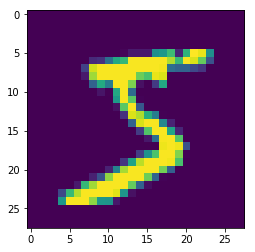

In [27]:
print(train_data.train_data.size())
plt.imshow(train_data.train_data[0])
plt.show()

In [48]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./mnist/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [35]:
test_data = torchvision.datasets.MNIST(root = "./mnist", train = False)


In [37]:
test_data.test_data.shape

torch.Size([10000, 28, 28])

In [41]:
test_x = torch.unsqueeze(test_data.test_data, dim = 1).type(torch.FloatTensor) / 255
test_y = test_data.test_labels

In [44]:
test_x[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [46]:
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = 1)

In [136]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels = 1,
                out_channels = 8,
                kernel_size = 3,
                stride = 1,
                padding = 0
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),
            nn.Flatten()
        )
        
        self.FC = nn.Linear(in_features = 13 * 13 * 8, out_features = 10)
        
        self.softmax = nn.Softmax()
        
    def forward(self, x):
        x = self.conv1(x)
        
        output = self.FC(x)
        return output
    

In [171]:
class test(nn.Module):
    def __init__(self):
        super(test, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels = 1,
                out_channels = 8,
                kernel_size = 3,
                stride = 1,
                padding = 0
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),
            nn.Flatten()
        )
        
        self.FC = nn.Linear(in_features = 13 * 13 * 8, out_features = 10)
        
        self.softmax = nn.Softmax()
        
    def forward(self, x):
        output = self.conv1(x)
        
        output = self.FC(output)
        
        return output
    

In [140]:
cnn = CNN()
# load parameters
cnn.load_state_dict(torch.load("../model/cnn.pth"))

test_output = cnn(test_x[:1])
#print(test_output)
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y)
print(test_y[:1])

tensor([[0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<ViewBackward>)
7
tensor([7])


In [172]:
test_cnn = test()
# load parameters
test_cnn.load_state_dict(torch.load("../model/cnn.pth"), strict = False)

for step, (batch_x, batch_y) in enumerate(train_loader):
    for e in batch_x:
        print(e)

    test_output = test_cnn(batch_x)

    cpt_path = '../data/check_file/'
    check_file = torch.flatten(test_output).detach().numpy()
    name = 'test_fc_output'
    with open(cpt_path + str(name), 'w') as f:
        for output in check_file:
            f.write(str(output) + ' ')
        
    break;


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [108]:
import warnings

warnings.filterwarnings("ignore")

cnn = CNN()

optimizer = torch.optim.Adam(cnn.parameters(), lr = learning_rate)

loss_function = nn.CrossEntropyLoss()

for epoch in range(epoches):
    print(("processing epoch %d...") % (epoch))
    
    for step, (batch_x, batch_y) in enumerate(train_loader):
        output = cnn(batch_x)
        loss = loss_function(output, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(step % 100 == 0):
            test_output = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = accuracy_score(pred_y, test_y.data.numpy())
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
            
    test_output = cnn(test_x[:10])
    pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze() #argmax
    print(pred_y)
    print(test_y[:10])

processing epoch 0...
Epoch:  0 | train loss: 2.8107 | test accuract: 0.12
Epoch:  0 | train loss: 3.2033 | test accuract: 0.50
Epoch:  0 | train loss: 1.0116 | test accuract: 0.70
Epoch:  0 | train loss: 1.6957 | test accuract: 0.72
Epoch:  0 | train loss: 0.0156 | test accuract: 0.75
Epoch:  0 | train loss: 3.8055 | test accuract: 0.73
Epoch:  0 | train loss: 0.1636 | test accuract: 0.82
Epoch:  0 | train loss: 0.1390 | test accuract: 0.81
Epoch:  0 | train loss: 0.0626 | test accuract: 0.80
Epoch:  0 | train loss: 0.4805 | test accuract: 0.85
Epoch:  0 | train loss: 0.0429 | test accuract: 0.84
Epoch:  0 | train loss: 0.2408 | test accuract: 0.85
Epoch:  0 | train loss: 0.0522 | test accuract: 0.81
Epoch:  0 | train loss: 0.1553 | test accuract: 0.84
Epoch:  0 | train loss: 0.0713 | test accuract: 0.84
Epoch:  0 | train loss: 0.4692 | test accuract: 0.86
Epoch:  0 | train loss: 1.6705 | test accuract: 0.87
Epoch:  0 | train loss: 0.0246 | test accuract: 0.83
Epoch:  0 | train loss: 

Epoch:  0 | train loss: 0.0988 | test accuract: 0.96
Epoch:  0 | train loss: 0.0009 | test accuract: 0.96
Epoch:  0 | train loss: 0.0017 | test accuract: 0.96
Epoch:  0 | train loss: 0.0082 | test accuract: 0.96
Epoch:  0 | train loss: 0.0002 | test accuract: 0.96
Epoch:  0 | train loss: 0.0053 | test accuract: 0.96
Epoch:  0 | train loss: 0.4775 | test accuract: 0.96
Epoch:  0 | train loss: 0.6203 | test accuract: 0.96
Epoch:  0 | train loss: 0.0124 | test accuract: 0.96
Epoch:  0 | train loss: 0.0040 | test accuract: 0.95
Epoch:  0 | train loss: 0.0037 | test accuract: 0.96
Epoch:  0 | train loss: 0.0330 | test accuract: 0.95
Epoch:  0 | train loss: 0.0537 | test accuract: 0.96
Epoch:  0 | train loss: 0.0006 | test accuract: 0.96
Epoch:  0 | train loss: 0.0098 | test accuract: 0.96
Epoch:  0 | train loss: 0.0008 | test accuract: 0.96
Epoch:  0 | train loss: 0.0400 | test accuract: 0.96
Epoch:  0 | train loss: 0.2236 | test accuract: 0.96
Epoch:  0 | train loss: 0.0914 | test accuract

Epoch:  0 | train loss: 0.0376 | test accuract: 0.96
Epoch:  0 | train loss: 0.5852 | test accuract: 0.96
Epoch:  0 | train loss: 0.3680 | test accuract: 0.97
Epoch:  0 | train loss: 0.0077 | test accuract: 0.97
Epoch:  0 | train loss: 0.0070 | test accuract: 0.97
Epoch:  0 | train loss: 0.0357 | test accuract: 0.97
Epoch:  0 | train loss: 0.2588 | test accuract: 0.96
Epoch:  0 | train loss: 0.0710 | test accuract: 0.97
Epoch:  0 | train loss: 0.0356 | test accuract: 0.97
Epoch:  0 | train loss: 0.0002 | test accuract: 0.97
Epoch:  0 | train loss: 0.0008 | test accuract: 0.96
Epoch:  0 | train loss: 0.0670 | test accuract: 0.97
Epoch:  0 | train loss: 0.0000 | test accuract: 0.97
Epoch:  0 | train loss: 0.0027 | test accuract: 0.97
Epoch:  0 | train loss: 0.2022 | test accuract: 0.97
Epoch:  0 | train loss: 0.0117 | test accuract: 0.97
Epoch:  0 | train loss: 0.0010 | test accuract: 0.97
Epoch:  0 | train loss: 0.0011 | test accuract: 0.97
Epoch:  0 | train loss: 0.0002 | test accuract

Epoch:  0 | train loss: 0.0004 | test accuract: 0.97
Epoch:  0 | train loss: 0.0053 | test accuract: 0.97
Epoch:  0 | train loss: 0.0082 | test accuract: 0.97
Epoch:  0 | train loss: 0.0012 | test accuract: 0.97
Epoch:  0 | train loss: 0.0032 | test accuract: 0.96
Epoch:  0 | train loss: 0.0000 | test accuract: 0.96
Epoch:  0 | train loss: 0.2588 | test accuract: 0.97
Epoch:  0 | train loss: 0.0293 | test accuract: 0.96
Epoch:  0 | train loss: 0.0002 | test accuract: 0.97
Epoch:  0 | train loss: 0.0043 | test accuract: 0.97
Epoch:  0 | train loss: 0.0016 | test accuract: 0.96
Epoch:  0 | train loss: 0.8505 | test accuract: 0.97
Epoch:  0 | train loss: 0.0001 | test accuract: 0.97
Epoch:  0 | train loss: 0.0004 | test accuract: 0.97
Epoch:  0 | train loss: 0.0004 | test accuract: 0.97
Epoch:  0 | train loss: 0.0029 | test accuract: 0.97
Epoch:  0 | train loss: 0.0001 | test accuract: 0.97
Epoch:  0 | train loss: 0.0120 | test accuract: 0.97
Epoch:  0 | train loss: 0.0051 | test accuract

Epoch:  1 | train loss: 0.0002 | test accuract: 0.97
Epoch:  1 | train loss: 0.1895 | test accuract: 0.97
Epoch:  1 | train loss: 0.0000 | test accuract: 0.97
Epoch:  1 | train loss: 0.0004 | test accuract: 0.97
Epoch:  1 | train loss: 0.0001 | test accuract: 0.97
Epoch:  1 | train loss: 0.0000 | test accuract: 0.97
Epoch:  1 | train loss: 0.0003 | test accuract: 0.97
Epoch:  1 | train loss: 0.0499 | test accuract: 0.97
Epoch:  1 | train loss: 0.0001 | test accuract: 0.97
Epoch:  1 | train loss: 0.0166 | test accuract: 0.96
Epoch:  1 | train loss: 0.0003 | test accuract: 0.97
Epoch:  1 | train loss: 0.0267 | test accuract: 0.97
Epoch:  1 | train loss: 0.0180 | test accuract: 0.97
Epoch:  1 | train loss: 0.0298 | test accuract: 0.97
Epoch:  1 | train loss: 0.0007 | test accuract: 0.97
Epoch:  1 | train loss: 0.0000 | test accuract: 0.97
Epoch:  1 | train loss: 0.0006 | test accuract: 0.97
Epoch:  1 | train loss: 0.0040 | test accuract: 0.97
Epoch:  1 | train loss: 0.0003 | test accuract

Epoch:  1 | train loss: 0.0064 | test accuract: 0.97
Epoch:  1 | train loss: 0.0028 | test accuract: 0.97
Epoch:  1 | train loss: 0.0205 | test accuract: 0.97
Epoch:  1 | train loss: 0.0006 | test accuract: 0.97
Epoch:  1 | train loss: 0.0009 | test accuract: 0.98
Epoch:  1 | train loss: 0.0051 | test accuract: 0.98
Epoch:  1 | train loss: 0.1279 | test accuract: 0.98
Epoch:  1 | train loss: 0.0008 | test accuract: 0.98
Epoch:  1 | train loss: 0.0001 | test accuract: 0.97
Epoch:  1 | train loss: 0.0000 | test accuract: 0.98
Epoch:  1 | train loss: 0.0251 | test accuract: 0.97
Epoch:  1 | train loss: 0.0000 | test accuract: 0.98
Epoch:  1 | train loss: 0.0012 | test accuract: 0.98
Epoch:  1 | train loss: 0.0204 | test accuract: 0.98
Epoch:  1 | train loss: 0.0009 | test accuract: 0.98
Epoch:  1 | train loss: 0.0056 | test accuract: 0.98
Epoch:  1 | train loss: 0.0011 | test accuract: 0.98
Epoch:  1 | train loss: 0.0016 | test accuract: 0.98
Epoch:  1 | train loss: 0.0008 | test accuract

Epoch:  1 | train loss: 0.0002 | test accuract: 0.97
Epoch:  1 | train loss: 0.1115 | test accuract: 0.97
Epoch:  1 | train loss: 0.0000 | test accuract: 0.97
Epoch:  1 | train loss: 0.0031 | test accuract: 0.97
Epoch:  1 | train loss: 0.0008 | test accuract: 0.97
Epoch:  1 | train loss: 0.0245 | test accuract: 0.98
Epoch:  1 | train loss: 0.0001 | test accuract: 0.97
Epoch:  1 | train loss: 0.0883 | test accuract: 0.97
Epoch:  1 | train loss: 0.0005 | test accuract: 0.98
Epoch:  1 | train loss: 0.0052 | test accuract: 0.97
Epoch:  1 | train loss: 0.0078 | test accuract: 0.97
Epoch:  1 | train loss: 0.0001 | test accuract: 0.97
Epoch:  1 | train loss: 0.0025 | test accuract: 0.97
Epoch:  1 | train loss: 0.0001 | test accuract: 0.97
Epoch:  1 | train loss: 0.0294 | test accuract: 0.98
Epoch:  1 | train loss: 0.0000 | test accuract: 0.98
Epoch:  1 | train loss: 0.2743 | test accuract: 0.97
Epoch:  1 | train loss: 0.0018 | test accuract: 0.97
Epoch:  1 | train loss: 0.0004 | test accuract

Epoch:  1 | train loss: 0.0001 | test accuract: 0.98
Epoch:  1 | train loss: 0.0001 | test accuract: 0.98
Epoch:  1 | train loss: 0.0005 | test accuract: 0.98
Epoch:  1 | train loss: 0.0010 | test accuract: 0.98
Epoch:  1 | train loss: 0.0260 | test accuract: 0.98
Epoch:  1 | train loss: 0.0054 | test accuract: 0.98
Epoch:  1 | train loss: 0.0000 | test accuract: 0.98
Epoch:  1 | train loss: 0.0029 | test accuract: 0.98
Epoch:  1 | train loss: 0.0071 | test accuract: 0.98
Epoch:  1 | train loss: 2.0534 | test accuract: 0.98
Epoch:  1 | train loss: 0.0057 | test accuract: 0.98
Epoch:  1 | train loss: 0.0037 | test accuract: 0.98
Epoch:  1 | train loss: 0.0054 | test accuract: 0.98
Epoch:  1 | train loss: 0.0000 | test accuract: 0.98
Epoch:  1 | train loss: 0.0018 | test accuract: 0.98
Epoch:  1 | train loss: 0.0001 | test accuract: 0.98
Epoch:  1 | train loss: 0.0000 | test accuract: 0.98
Epoch:  1 | train loss: 0.0000 | test accuract: 0.98
Epoch:  1 | train loss: 0.0001 | test accuract

In [133]:
test_output = cnn(test_x[:10])
print(test_output)
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y)
print(test_y[:10])

tensor([[-15.8691, -20.4210, -12.2617,  -8.8932, -20.5734, -19.7938, -30.4324,
           1.2789, -12.8824, -11.3164],
        [-16.5492, -19.1147,  -6.0860, -16.7400, -25.7764, -18.1991, -14.7787,
         -40.4990, -16.4264, -28.7779],
        [-11.9197,   1.1983,  -7.1548,  -9.1187,  -6.3031,  -9.5871, -11.0430,
          -9.8213,  -7.8487, -10.5078],
        [ -2.8273, -25.2429, -14.0327, -16.7457, -17.5488, -14.4820, -13.8328,
         -20.1043, -16.3477, -13.0368],
        [-13.5767, -22.1061, -15.8306, -12.7644,  -1.8660, -19.6274, -13.8663,
         -13.5797, -14.8230,  -7.2967],
        [-10.7551,   0.9979,  -6.7629,  -9.2626,  -5.9493, -11.3666, -12.5249,
          -5.7081,  -7.2850,  -8.6097],
        [-26.0220, -18.3382, -17.1139, -15.3935,  -3.7838, -15.6390, -25.2659,
         -13.0112, -13.6627, -11.4186],
        [-24.5699, -17.2270, -15.3113, -14.8903,  -8.5665, -10.0910, -20.8976,
         -19.0979,  -9.2919,  -2.3492],
        [-20.5367, -26.4240, -20.9178, -21.0867,

In [135]:
#save parameters
torch.save(cnn.state_dict(), "../model/cnn.pth")


In [ ]:
cnn = CNN()
# load parameters
cnn.load_state_dict(torch.load("../model/cnn.pth"))

In [130]:
save_path = '../data/stored_weights/'
for name, w in cnn.named_parameters():
    w_flat = torch.flatten(w).detach().numpy()
    with open(save_path + str(name), 'w') as f:
        for weight in w_flat:
            f.write(str(weight) + ' ')
